In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
master_df = pd.read_pickle("master_df.pkl")
master_df

,Date,Adj Close,Close,High,Low,Open,Volume,ETF
0,2007-11-07,418.000000,418.000000,454.200012,384.000000,390.000000,595380.0,ANTE
1,2007-11-08,380.000000,380.000000,407.000000,370.000000,390.000000,162105.0,ANTE
2,2007-11-09,388.000000,388.000000,394.600006,364.000000,370.000000,84805.0,ANTE
3,2007-11-12,371.200012,371.200012,386.000000,360.000000,360.000000,62680.0,ANTE
4,2007-11-13,360.000000,360.000000,377.600006,360.000000,366.200012,90480.0,ANTE
...,...,...,...,...,...,...,...,...
18387217,2025-01-30,50.630001,50.630001,52.270000,48.650002,50.029999,4578200.0,NXT
18387218,2025-01-31,50.419998,50.419998,52.139999,50.395000,51.130001,2389700.0,NXT
18387219,2025-02-03,48.599998,48.599998,49.430000,47.750000,48.320000,2570700.0,NXT
18387220,2025-02-04,49.750000,49.750000,50.340000,47.660000,48.820000,2268300.0,NXT


In [3]:
#master_df.set_index("Date")

In [4]:
master_df["MA50"] = master_df["Adj Close"].rolling(window=50).mean()
master_df["MA200"] = master_df["Adj Close"].rolling(window=200).mean()

In [5]:
etf_key = "QQQM"
df_sample = master_df[master_df["ETF"] == etf_key]

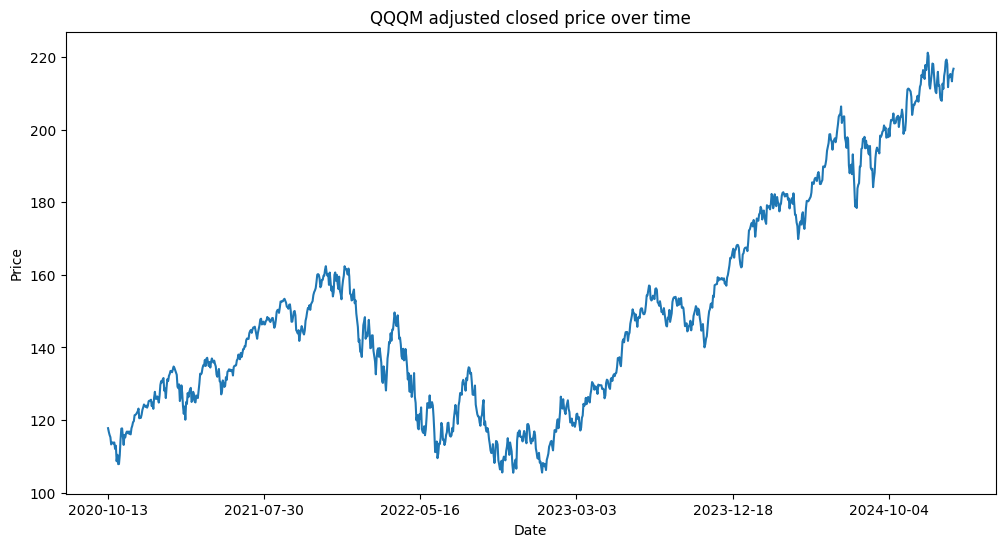

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df_sample["Date"], df_sample["Adj Close"], label="Adjusted close")
plt.title(f"{etf_key} adjusted closed price over time")
plt.xlabel("Date")
plt.ylabel("Price")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(7))
plt.show()

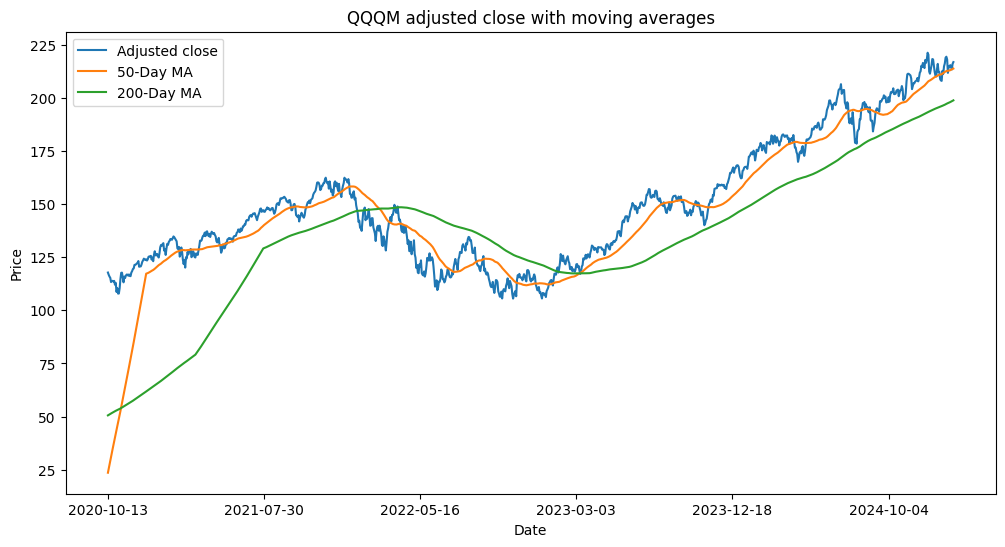

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df_sample["Date"], df_sample["Adj Close"], label="Adjusted close")
plt.plot(df_sample["Date"], df_sample["MA50"], label='50-Day MA')
plt.plot(df_sample["Date"], df_sample["MA200"], label='200-Day MA')
plt.title(f"{etf_key} adjusted close with moving averages")
plt.xlabel("Date")
plt.ylabel("Price")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(7))
plt.legend()
plt.show()